<a href="https://colab.research.google.com/github/lwisnefske/data-science-and-analytics-portfolio/blob/main/Wisnefske_Titanic_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [ ]:
#Step 1 - import libraries/packages needed for different models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier


#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 2 - upload titanic.csv dataset
from google.colab import files
titanic = files.upload()



Saving Titanic.csv to Titanic (2).csv


In [ ]:
#name titanic dataframe
df_titanic = pd.read_csv('Titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#datatypes, dataframe shape 
print(df_titanic.dtypes)
print(df_titanic.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)


#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

The target for this model is 'Survived.' I am trying to correctly classify whether a passenger would survive or not based on the other factors provided in the dataset. I would delete 'PassengerId', 'Name', and 'Ticket' because these do not provide any useful data, but simply identify the individual passengers. I would probably omit 'Cabin' because there are only 204 cabin numbers assigned for the 891 passengers aboard the Titanic.

In [ ]:
#drop columns 
df_titanic=df_titanic.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [ ]:
#Step 3 - define X and y 
# rerun coding dropping 'SibSp' and 'Parch' columns; 'Fare'; 'Embarked'

X = df_titanic[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = df_titanic['Survived']

In [ ]:
#imputing embark with most common depature city
df_titanic['Embarked']=df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In order to use the sex of the passengers as a variable in the models, that column needs to be encoded. Since it is not an ordinal variable (there is no inherent heirarchy between male and female), I chose to use one-hot encoding. I did the same type of encoding for 'Embarked', because it is also a nominal variable.


In [ ]:
#one hot encoding for sex of passenger
one_hot = pd.get_dummies(data=X, columns=['Sex','Embarked'])

print(one_hot.head())

print(one_hot.columns)

X = pd.DataFrame(one_hot)


   Pclass   Age     Fare  SibSp  Parch  Sex_female  Sex_male  Embarked_C  \
0       3  22.0   7.2500      1      0           0         1           0   
1       1  38.0  71.2833      1      0           1         0           1   
2       3  26.0   7.9250      0      0           1         0           0   
3       1  35.0  53.1000      1      0           1         0           0   
4       3  35.0   8.0500      0      0           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
Index(['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [ ]:
#splitting dataset into training, validation, and test sets
#training/validation and test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#training and validation

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 4
#null values
df_titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Of the twelve features in this dataset, only three of them contain null values. Even though we don't know the age of 177 passengers (approximately 20% of the total), we can easily impute this data using the average age of the remaining 714 passengers, however, that will be done *after* the data is split to avoid data leakage. Unlike the passengers' ages, their cabin number cannot be easily imputed. 687 passengers in this dataset do not have a cabin number (roughly 77% of the data). Since the cabin number likely only applies to passengers in first class and represents a small portion of the full dataset, I would remove 'Cabin' from the working dataframe instead of trying to impute a value. Lastly, two entries are missing the city of embarkment. I would replace the null value with the most popular departure city from the rest of the passengers.

In [ ]:
#examine relationship between Pclass and Cabin to determine if Cabin should be imputed or dropped

df_class = df_titanic[['Pclass', 'Cabin']]
display(df_class)

print((df_class == 1).sum())
print(df_class.isna().sum())

,Pclass,Cabin
0,3,NaN
1,1,C85
2,3,NaN
3,1,C123
4,3,NaN
...,...,...
886,2,NaN
887,1,B42
888,3,NaN
889,1,C148


Pclass    216
Cabin       0
dtype: int64
Pclass      0
Cabin     687
dtype: int64


In [ ]:
#Count for how many passengers in 1st class also have assigned cabin numbers
df_titanic.value_counts([(df_titanic['Pclass']== 1) & (df_titanic['Cabin'] != np.nan)])

False    675
True     216
dtype: int64

There are 216 1st class passengers and 204 assigned cabin numbers. The discrepency between the two totals could be attributed to multiple passengers who are family members staying in the same cabin.

In [ ]:
X.isna().sum()

Pclass          0
Age           177
Fare            0
SibSp           0
Parch           0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [ ]:
#imputing age with mean value of remaining passengers
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_ = imp_mean.fit_transform(X_train)
                                  
X_train = pd.DataFrame(X_train_)


#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



For the baseline model, I am using logistic regression. This is the most basic classification algorithm we discussed in class, it is simple to understand and explain, and it's generally a good starting point when developing machine learning classification models.

In [ ]:
# Step 5 - logistic regression
log_reg = LogisticRegression(random_state=0)

log_reg_model = log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [ ]:
#Step 6 - logistic regression accuracy

log_accuracy = log_reg_model.score(X_train, y_train)

print(log_accuracy)

0.797752808988764


The baseline model is doing an adequate job of fitting the data, but the accuracy score can be improved. As it stands, the logistic regression model has approximately an 79.8% accuracy of prediction a passenger's survival on the Titanic. After removing the features with family connections (Sibsp, Parch), the accuracy decreased to 78.9%. If you only remove ticket fare (as it is closely related to passenger class), there is a marginal increase in accuracy to 79.1%, but it is still lower than the initial baseline model. Removing the embarkment cities results in an accuracy percentage of 79.3%, so like removing the fare feature, it is more accurate than removing family members but less accurate than including all of the features.

# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 7 - KNN Nearest Neighbors - create pipeline

knn_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('KNN', KNeighborsClassifier())])

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())])

In [ ]:
#KNN - evaluate pipeline

knn_scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)

print(knn_scores)

print(knn_scores.mean())
print(knn_scores.std())

[0.77777778 0.88888889 0.8        0.8        0.71111111 0.81818182
 0.75       0.77272727 0.81818182 0.79545455]
0.7932323232323233
0.04445660990526551


In the initial KNN evaluation, the 10 iterations of cross validation had a mean accuracy percent of 79.3%, half a percentage point lower than the first rendition of the logistic regression model. The standard deviation of .044 indicates that all the scores within the cross validation were consistently similar to each other.

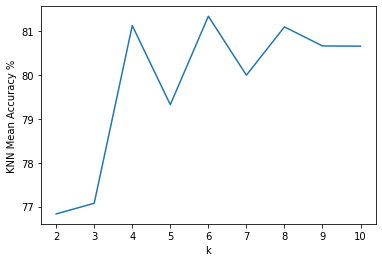

In [ ]:
#KNN - plot values for ideal K

k = list(range(2,11))
mean_accuracy = []

for i in k:
  knn_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', StandardScaler()), 
                     ('KNN', KNeighborsClassifier(n_neighbors=i))])

  knn_pipe.fit(X_train, y_train)
  scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


k_knn_df = pd.DataFrame(k)
k_knn_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_knn = pd.DataFrame(mean_accuracy)*100
mean_accuracy_knn.rename({0:'knn mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_knn_df, mean_accuracy_knn], axis=1)

plt.plot(to_plot['k'], to_plot['knn mean accuracy'])
plt.xlabel('k')
plt.ylabel('KNN Mean Accuracy %')
plt.show()


The two k values that have the highest mean accuracy percentage are 4 and 6. While 4 is slightly less accurate than 6, the difference is negligible. In my final pipeline, I will use 4 because it is the smallest value of k with the highest percentage. By using the smaller k value, it should take less time to run the algorithm and use less memory.

In [ ]:
#final knn pipeline with k = 4

knn_pipe_4 = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('KNN', KNeighborsClassifier(n_neighbors = 4))])

knn_pipe_4.fit(X_train, y_train)

knn_p4_scores = cross_val_score(knn_pipe_4, X_train, y_train, cv=10)

print(knn_p4_scores)

print(knn_p4_scores.mean())
print(knn_p4_scores.std())

[0.82222222 0.88888889 0.82222222 0.75555556 0.75555556 0.86363636
 0.81818182 0.75       0.81818182 0.81818182]
0.8112626262626262
0.04371768633353451


The final KNN Nearest Neighbors pipeline has an average accuracy score of .811 and a standard deviation of .044. This model has produced the highest accuracy thus far, and can accurately predict if someone survived the sinking of the Titanic 81.1% of the time. It also has a similar standard deviation to the cross validation scores of the first KNN model, so the scores are also consistent within themselves.

In [ ]:
#Naive Bayes (Gaussian) Classification Model - build pipeline

nb_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('nb', GaussianNB())])

nb_pipe.fit(X_train, y_train)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('nb', GaussianNB())])

In [ ]:
#NB - evaluate pipeline

nb_scores = cross_val_score(nb_pipe, X_train, y_train, cv=10)

print(nb_scores)

print(nb_scores.mean())
print(nb_scores.std())


[0.71111111 0.77777778 0.82222222 0.8        0.73333333 0.84090909
 0.75       0.72727273 0.86363636 0.70454545]
0.7730808080808081
0.05358252638655555


Of the three models so far, the Naive Bayes Classification Model has the lowest accuracy score. With the 10-fold cross validation, its mean score is .773, .016 lower than the worst performing logistic regression model. The Naive Bayes model correctly classified survivors 77.3% of the time. With a standard deviation of .053, the scores were once again very consistent.

In [ ]:
#Decision Tree Classifier - build pipeline
tree_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree', DecisionTreeClassifier(criterion='entropy',random_state=42))])

tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [ ]:
#Tree - evaluate entropy tree
tree_scores = cross_val_score(tree_pipe, X_train, y_train, cv=10)

print(tree_scores)

print(tree_scores.mean())
print(tree_scores.std())

[0.8        0.86666667 0.82222222 0.68888889 0.8        0.68181818
 0.79545455 0.54545455 0.70454545 0.70454545]
0.7409595959595962
0.08912372846562658


The decision tree using entropy as its classifier has the lowest accuracy mean of all the the models and their respective variations. With an accuracy of percentage 74.1%, the model would accurately predict survival 3 out of every 4 times. While the standard deviation is still relatively low (.089), it's about twice as much as the other models. This group of scores is the least consistent. 

In [ ]:
#Tree - build pipeline 2
tree_2_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('tree_2', DecisionTreeClassifier(criterion='gini',random_state=42))])

tree_2_pipe.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('tree_2', DecisionTreeClassifier(random_state=42))])

In [ ]:
#Tree - evaluate gini tree
tree_2_scores = cross_val_score(tree_2_pipe, X_train, y_train, cv=10)

print(tree_2_scores)

print(tree_2_scores.mean())
print(tree_2_scores.std())

[0.77777778 0.86666667 0.84444444 0.66666667 0.8        0.75
 0.84090909 0.65909091 0.72727273 0.75      ]
0.7682828282828283
0.06815405345649489


The Decision Tree Classifier that uses Gini as the criterion is the second worst performing model, only performing better than the first decision tree. The mean accuracy of the 10-fold cross validation is .768, which is .027 higher than the first decision tree, and half a percentage point lower than the Naive Bayes model. The .068 standard deviation is lower than the first tree, but higher than the rest of the models. 

In [ ]:
#AdaBoost Classifier - build pipeline
ab_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('ada', AdaBoostClassifier(random_state=42))])

ab_pipe.fit(X_train, y_train)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('ada', AdaBoostClassifier(random_state=42))])

In [ ]:
#Adaboost Classifier - evaluate pipeline
ab_scores = cross_val_score(ab_pipe, X_train, y_train, cv=10)

print(ab_scores)

print(ab_scores.mean())
print(ab_scores.std())

[0.75555556 0.77777778 0.86666667 0.8        0.77777778 0.84090909
 0.84090909 0.75       0.84090909 0.70454545]
0.7955050505050505
0.04882375764189461


The AdaBoost Classifier Model has an mean accuracy score of .796 and a standard deviation of .049. The model correctly classified a passenger's survival on average 79.6% of the time. The accuracy scores throughout the 10-fold cross validation process were fairly consistent, as indicated by the .049 standard deviation.

In [ ]:
#Gradient Boost Classifier - build pipeline

gb_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42))])

gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('Gradient', GradientBoostingClassifier(random_state=42))])

In [ ]:
#GB Boost - evaluate pipeline

gb_scores = cross_val_score(gb_pipe, X_train, y_train, cv=10)

print(gb_scores)

print(gb_scores.mean())
print(gb_scores.std())

[0.84444444 0.88888889 0.88888889 0.86666667 0.8        0.81818182
 0.84090909 0.75       0.81818182 0.75      ]
0.8266161616161616
0.047405413587740704


The GradientBoost Classification Model has the highest mean accuracy score and a relatively low standard deviation. Not only are the scores from the 10-fold cross validation process consistent with each other, the model correctly classified a passenger's survival 82.6% of the time, 1.5% higher than the KNN Nearest Neighbors Model (the previous best performing model).

   gb learning rate  gb mean accuracy
0               0.1         82.661616
1               0.2         80.661616
2               0.3         80.202020
3               0.4         78.409091
4               0.5         78.176768


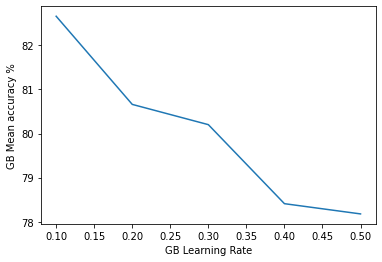

In [ ]:
mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
  gb_pipe = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                     ('scaler', StandardScaler()), 
                     ('Gradient', GradientBoostingClassifier(random_state=42, learning_rate=i))])

  gb_pipe.fit(X_train, y_train)
  gb_scores = cross_val_score(gb_pipe, X_train, y_train, cv=10)
  mean_accuracy.append(gb_scores.mean())


learning_rate_gb = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_gb.rename({0:'gb learning rate'}, axis=1, inplace=True)

mean_accuracy_gb = pd.DataFrame(mean_accuracy)*100
mean_accuracy_gb.rename({0:'gb mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_gb, mean_accuracy_gb], axis=1)

print(to_plot)

plt.plot(to_plot['gb learning rate'], to_plot['gb mean accuracy'])
plt.xlabel('GB Learning Rate')
plt.ylabel('GB Mean accuracy %')
plt.show()

The Gradient Boost Classification Model relies heavily on values for different hyperparameters. The learning rate of .10 has the highest mean accuracy and is the default for this model. I will not need to change this hyperparameter for the validation and test sets.

# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

The model with the highest accuracy is the GradientBoost Classifier. The average accuracy of this model is 82.6% for the training set. The single best accuracy score I was able to achieve was 88.9%. This was the second fold of the 10-fold cross validation for both the GradientBoost pipeline and the first KNN pipelines.

In [ ]:
#Gradient Boost - evaluate validation set to ensure there isn't any overfitting
gb_pipe.fit(X_val, y_val)

gb_val_scores = cross_val_score(gb_pipe, X_val, y_val, cv=10)

print(gb_val_scores)

print(gb_val_scores.mean())
print(gb_val_scores.std())

[0.82608696 0.82608696 0.86956522 0.81818182 0.86363636 0.72727273
 0.81818182 0.68181818 0.90909091 0.86363636]
0.8203557312252965
0.06478747989123315


The validation set has an average accuracy score of .820 and a standard deviation .064. The GradientBoost model can accurately predict a passenger's survival on the Titanic 82.0% of the time. While the accuracy percentage of the training set is higher (82.6%), there is not a huge discrepency and we can assume the GradientBoost model is not overfitting the data in the training set.

In [ ]:
# Step 8 - Test GradientBoost
gb_pipe.fit(X_test, y_test)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('Gradient',
                 GradientBoostingClassifier(learning_rate=0.5,
                                            random_state=42))])

In [ ]:
#GradientBoost- FINAL TEST SCORES
gb_test_scores = cross_val_score(gb_pipe, X_test, y_test, cv=10)

print(gb_test_scores)

print(gb_test_scores.mean())
print(gb_test_scores.std())

[0.91304348 0.60869565 0.69565217 0.77272727 0.77272727 0.72727273
 0.77272727 0.81818182 0.77272727 0.63636364]
0.7490118577075099
0.08344977205817158


The GradientBoost model accurately classifies a passenger's survival on the Titanic accurately 74.9% of the time in the test set with a relatively high standard deviation of .083.

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:
**Indentifying target/prepping data:**

I determined that the model target was 'Survived.' The machine learning models use the features (the remaining columns) to determine the probability of a passenger survining the sinking of the Titanic. Ultimately, I dropped 'PassengerId', 'Name', and 'Ticket' from my dataframe because they did not provide any useful information other than identification for the set. I also omitted 'Cabin' from my final dataframe because the only passengers who had cabin numbers were in first class. There were only 204 cabins assigned for the the 891 passengers aboard the Titanic (roughly 77% of the data in this column was null). Unlike the 'Cabin' column, I chose to impute the 'Age' feature using mean. I waited until after the train_test_split to impute the ages in order to avoid data leakage. I chose to one-hot encode both the 'Sex' and 'Embarked' columns. Both variables are nominal and do not have an inherent heirarchy.


**Baseline model:**

Since the models are trying to correctly determine whether a passenger would survive the sinking of the Titanic, I decided to use classification algorithms. I started with Logistic Regression Model because it is the most common and basic classification model we disussed in class. It is also the easiest to explain to other people. I ran the Logistic Regression with all of the remaining features first ('Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked'). The accuracy score was .798, meaning that it accurately classified if someone survived 79.8% of the time. After removing the features with family connections (Sibsp, Parch), the accuracy decreased to 78.9%. When ticket fare was removed (as it is closely related to passenger class), the accuracy to 79.1%, but it is still lower than the initial baseline model. Removing the cities of embarkment had an accuracy percentage of 79.3%. Like removing the fare feature, it is more accurate than removing family members but less accurate than including all of the features.

**Other models:**

The models I chose were the KNN Nearest Neighbors Model, the Naive Bayes Classification Model, and the Decision Tree Classifier Model. In each case, I needed to examine if passengers survived or not. Because the result is not numeric, I needed to use classification models. I was also working with supervised data where I had proper labels, which is compatible with the models I chose. I evaluated each model on its mean accuracy score and standard deviation, derived from 10-fold cross validation. Of the models I worked with, the KNN Nearest Neighbors model produced the second greatest mean accuracy percentage and lowest standard deviation (81.1% and .044 respectively). I chose the KNN Nearest Neighbors model because, like the logistic regression model, it is relatively simple to understand and explain. The Naive Bayes Classification Model had second highest mean accuracy percentage (77.3%) for the other models group. I chose to work with this particular model because I like that it treats each feature independently. Even though it is not as accurate as other models and has a tendency towards overfitting, I chose the Decision Tree Classifier Model because it is incredibly intuitive and easy to explain to other people. The two versions I ran were the poorest performing models, with the 'entropy' version being the worst. The entropy version of the model was only averaging 74.1% accuracy and had the highest standard deviation at .089. The final two models I used were AdaBoost and GradientBoost. These are considered the most effective classification models and thus an optimal choice for this exercise, but are more difficult to explain to others. The AdaBoost model had an average mean accuracy of 79.6% and a standard deviation of .049. Although it was one of the better performing models, it did not have the highest mean accuracy score. The model that ultimately had the highest mean accuracy score was the GradientBoost Classification Model. This model had a mean accuracy score of .826 and a standard deviation of .047. Not only did the model correctly classify a passenger's survival an average of 82.6% of the time (1.5% more then the next highest model), but the scores within the 10-fold cross validation were also consistent with one another.

**Best model:**

The best model I developed was the GradientBoost Classification Model. It had the highest mean accuracy percentage at 82.6% with the training set. When I ran the validation set, the accuracy decreased to 82.0%, but it was clear that the model was not overfit to the training set. When I ran the final test set for the GradientBoost Model, it had a mean accuracy of 74.9% and a standard deviation of .083. This means the the model correctly identified a passenger's survival, on average, 3 out of 4 times. The scores were not nearly as consistent throughout the 10-fold cross validation process as the training and validation sets. While correctly classifying a passenger's survival 75% of the time is sufficient for examining an event that happened 110 years ago, it would not be a high enough percentage if we were trying to determine something more critical (e.g. whether someone has cancer or not).